In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
#from tensorflow.keras.datasets import mnist

In [5]:
import pandas as pd
import numpy as np

# Load the train and test datasets from CSV
train = pd.read_csv('/train.csv') # Train data should be loaded here
test = pd.read_csv('/test.csv')# Test data should be loaded here

# Inspect the column names to identify the correct column
print(train.columns)

# If the column is named 'label', this will work:
# Separate features (images) and labels (digits) in the train set
X_train = train.drop(columns=['label']).values  # Drop the 'label' column to get the features
y_train = train['label'].values  # The 'label' column contains the digits (0-9)

# Reshape the image data to the format (num_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28)

# Similarly, handle the test set (without labels)
X_test = test.values  # No labels in the test set
X_test = X_test.reshape(-1, 28, 28)

# Print the shapes to verify
print(f'Training data shape: {X_train.shape}')  # Expected: (num_samples, 28, 28)
print(f'Test data shape: {X_test.shape}')  # Expected: (num_samples, 28, 28)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Training data shape: (42000, 28, 28)
Test data shape: (28000, 28, 28)


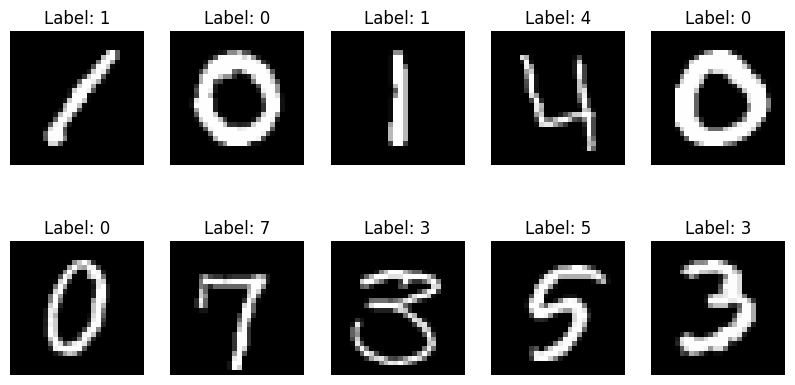

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


In [8]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


KNN Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



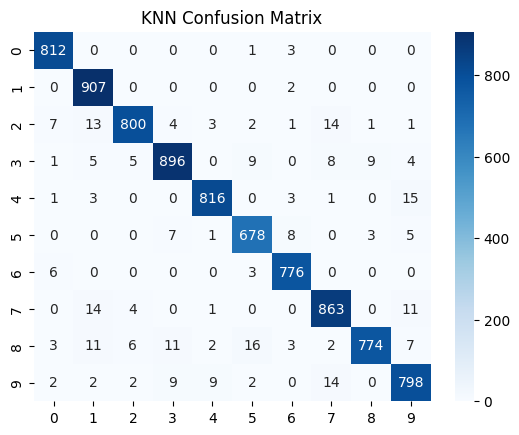

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.96      0.98      0.97       909
           2       0.91      0.93      0.92       846
           3       0.91      0.91      0.91       937
           4       0.93      0.95      0.94       839
           5       0.90      0.90      0.90       702
           6       0.96      0.95      0.95       785
           7       0.95      0.93      0.94       893
           8       0.92      0.89      0.90       835
           9       0.94      0.91      0.92       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



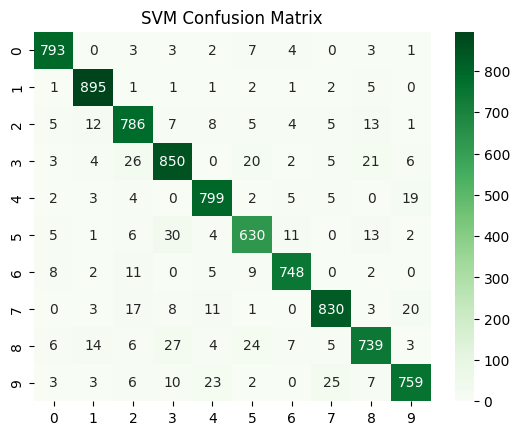

In [10]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

SVM Test Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.96      0.98      0.97       909
           2       0.91      0.93      0.92       846
           3       0.91      0.91      0.91       937
           4       0.93      0.95      0.94       839
           5       0.90      0.90      0.90       702
           6       0.96      0.95      0.95       785
           7       0.95      0.93      0.94       893
           8       0.92      0.89      0.90       835
           9       0.94      0.91      0.92       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



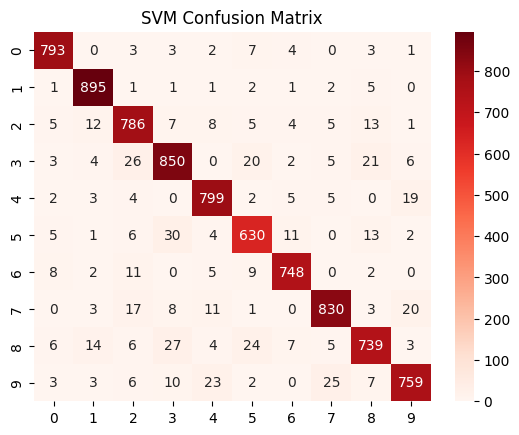

In [11]:
# Split the dataset into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42
)

# Train the SVM model on the training set
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

# Predict on the test set (which now contains labels)
y_test_pred_svm = svm_model.predict(X_test_split)

# Calculate the test accuracy
test_acc_svm = accuracy_score(y_test_split, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

# Optionally, print more evaluation metrics
print(classification_report(y_test_split, y_test_pred_svm))
sns.heatmap(confusion_matrix(y_test_split, y_test_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("SVM Confusion Matrix")
plt.show()
